In [26]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg


In [27]:
x_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 1901-2010.csv",index_col=0)
y_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Cluster Number 1901-2010.csv",index_col=0)
x_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 2011-2022.csv",index_col=0)
y_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Cluster Number 2011-2022.csv",index_col=0)


In [33]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [34]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model.predict(x_test)

In [36]:
y_pred

array([4, 2, 4, 4, 6, 4, 3, 6, 6, 6, 6, 6], dtype=int64)

In [32]:
y_array=y_test.values.ravel()
y_array

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8], dtype=int64)

In [20]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD Rainfall Clusters Images\Cluster {i}.png"))
    

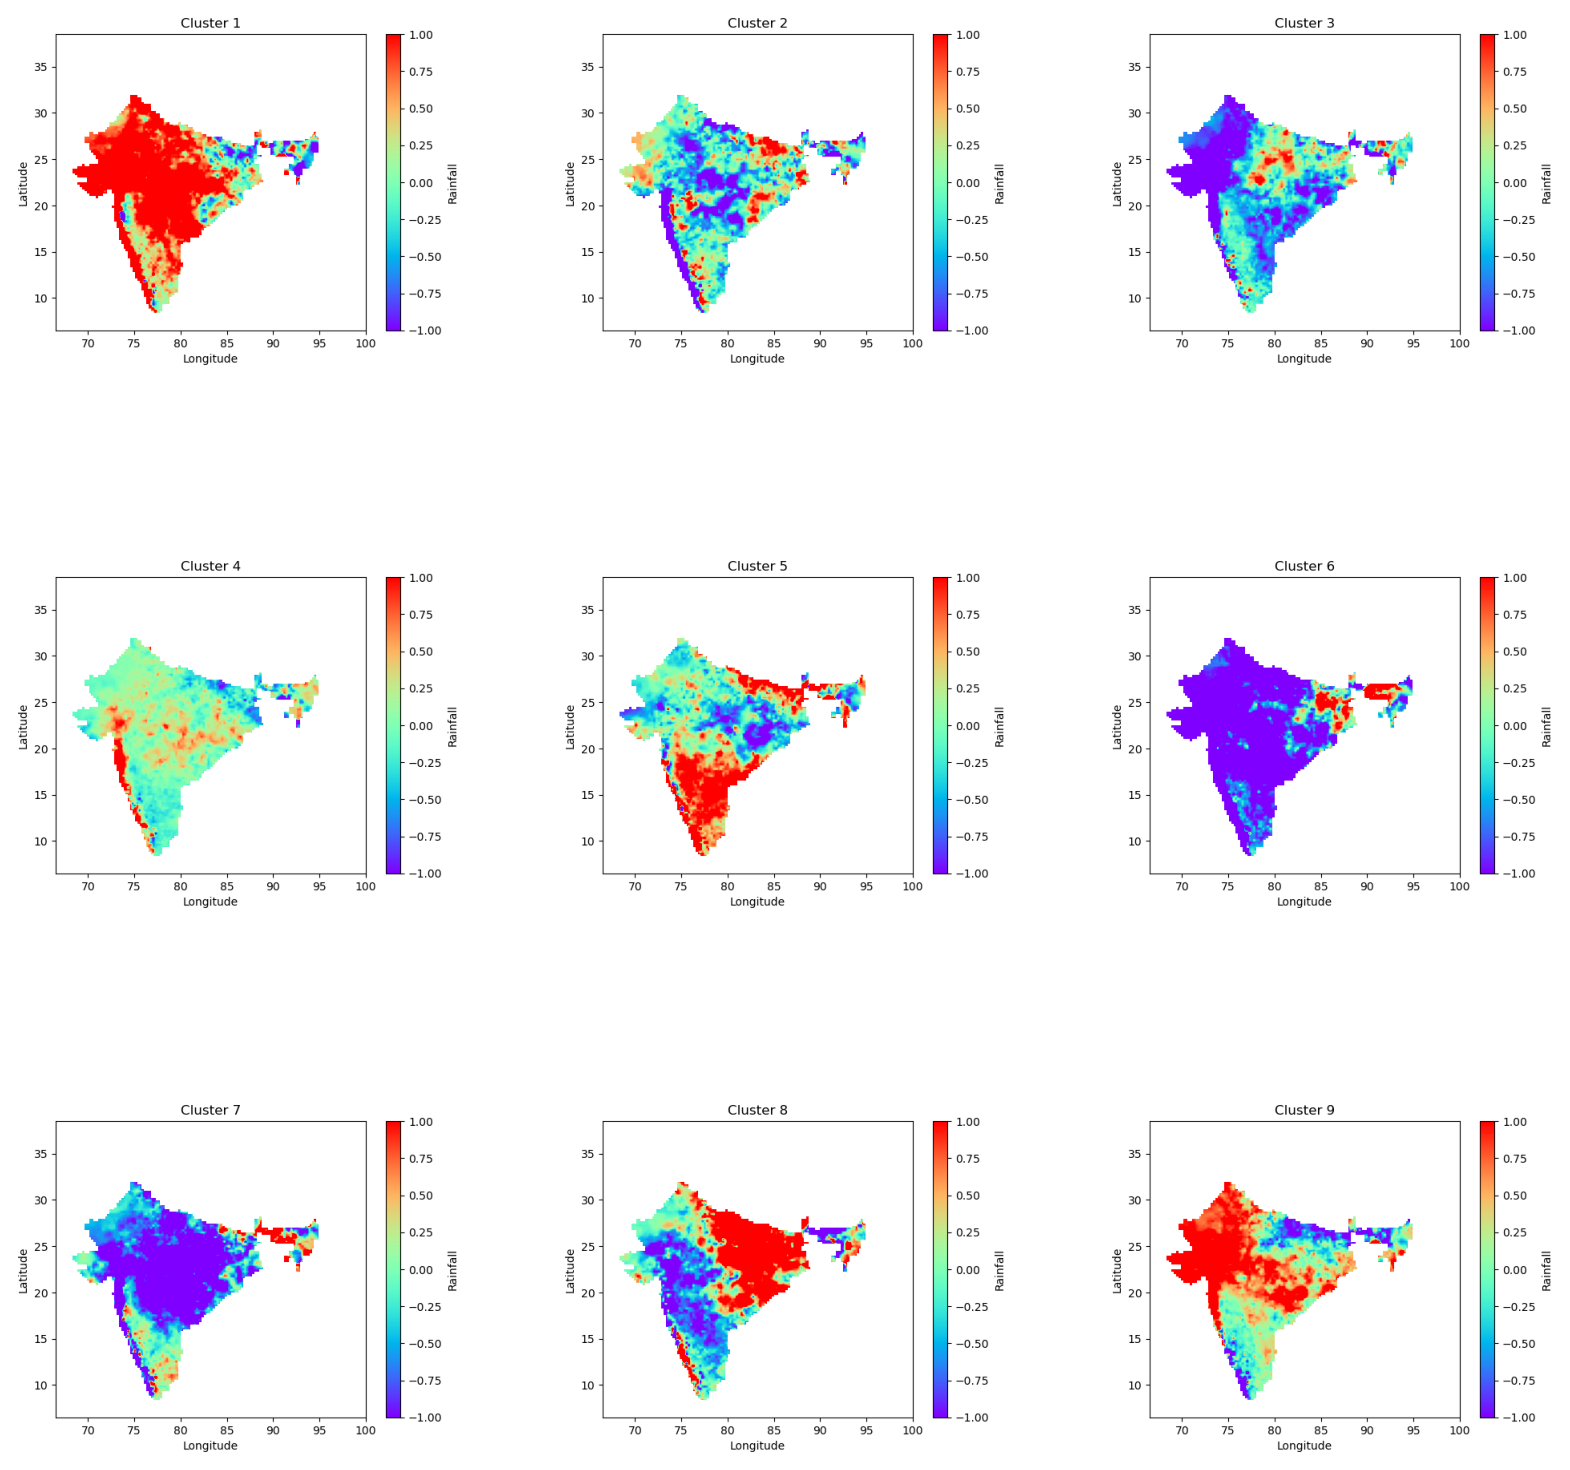

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off') 

In [23]:
actual_years_map=[]
year=2011
for i in range(12):
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\2011-2022 Rainfall Anomaly Images\\{year} Rainfall.png"))
    year+=1
                        

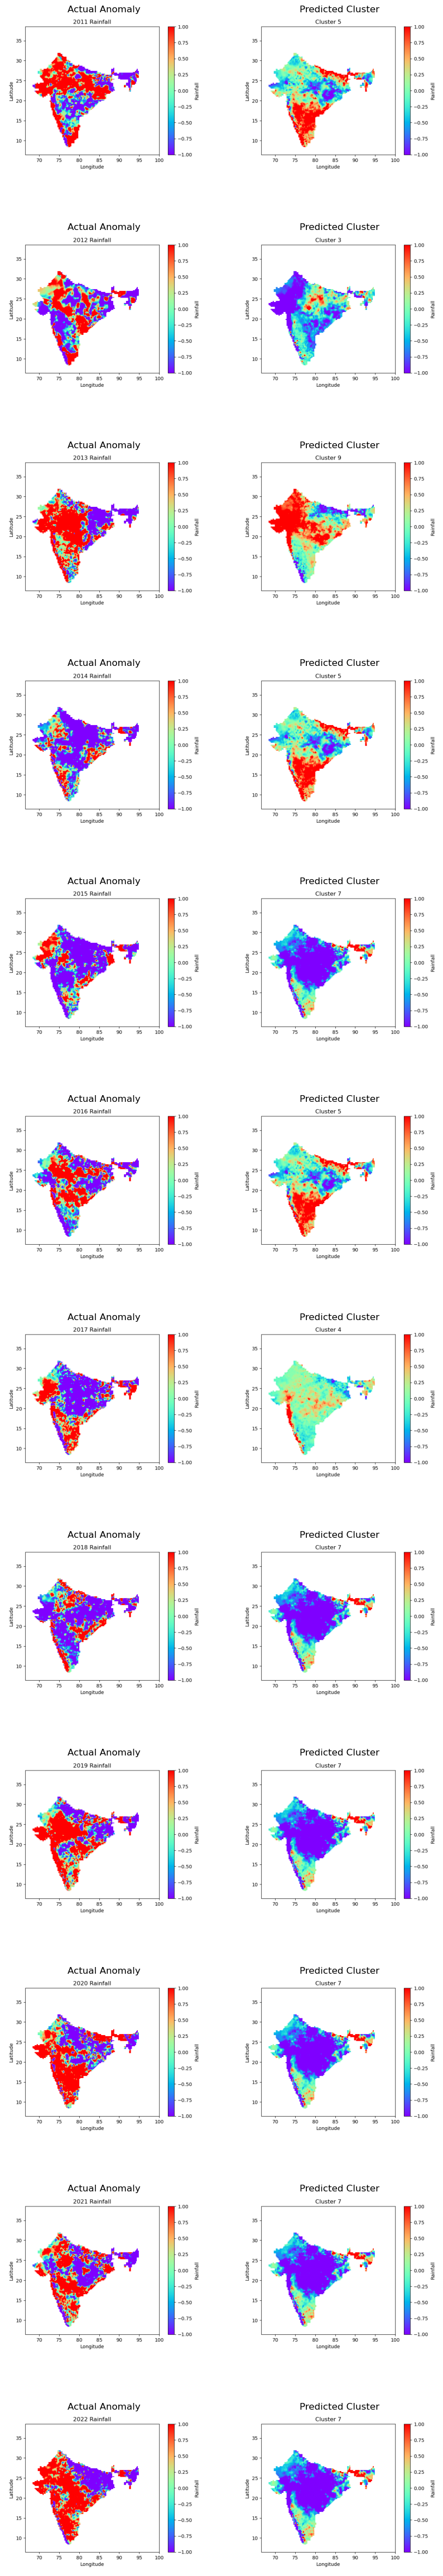

In [24]:
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


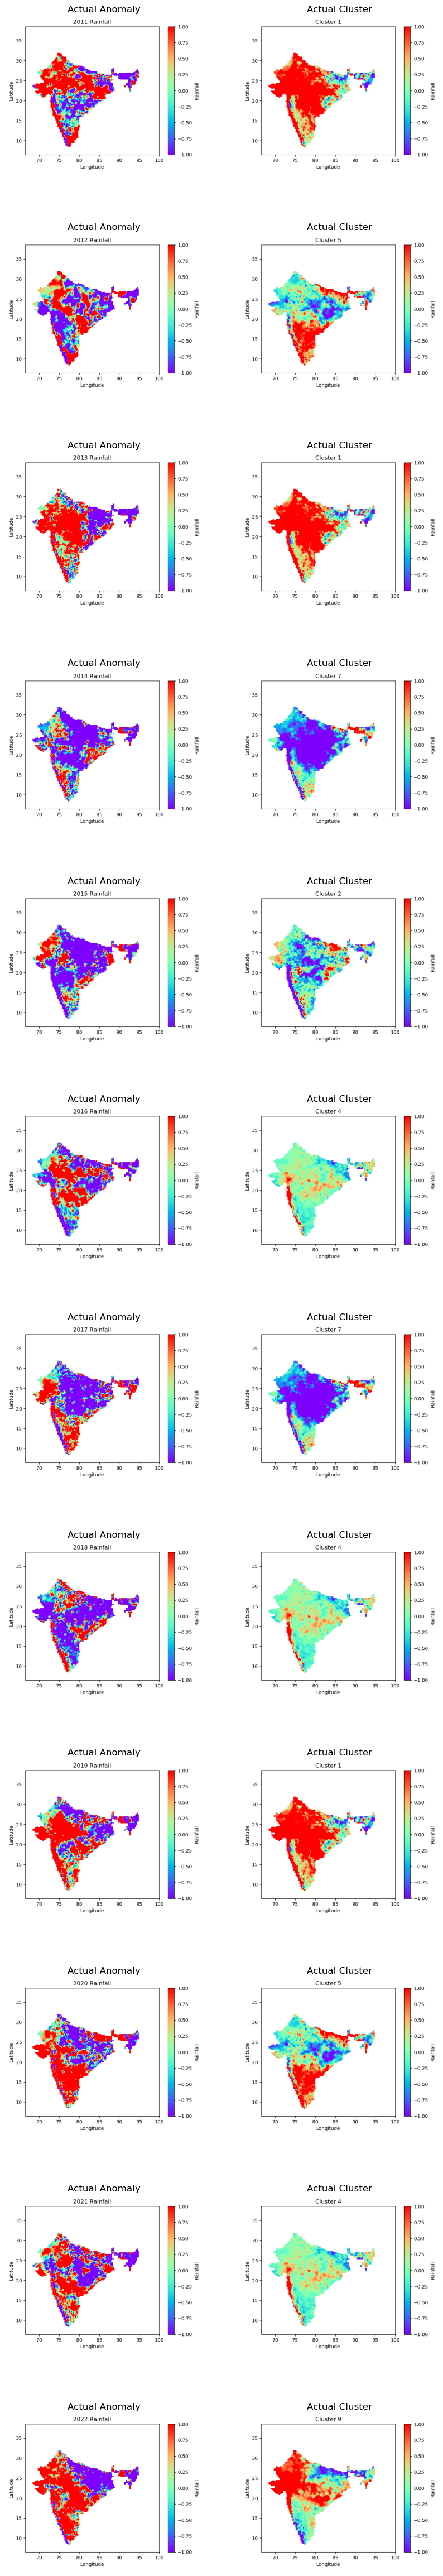

In [25]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

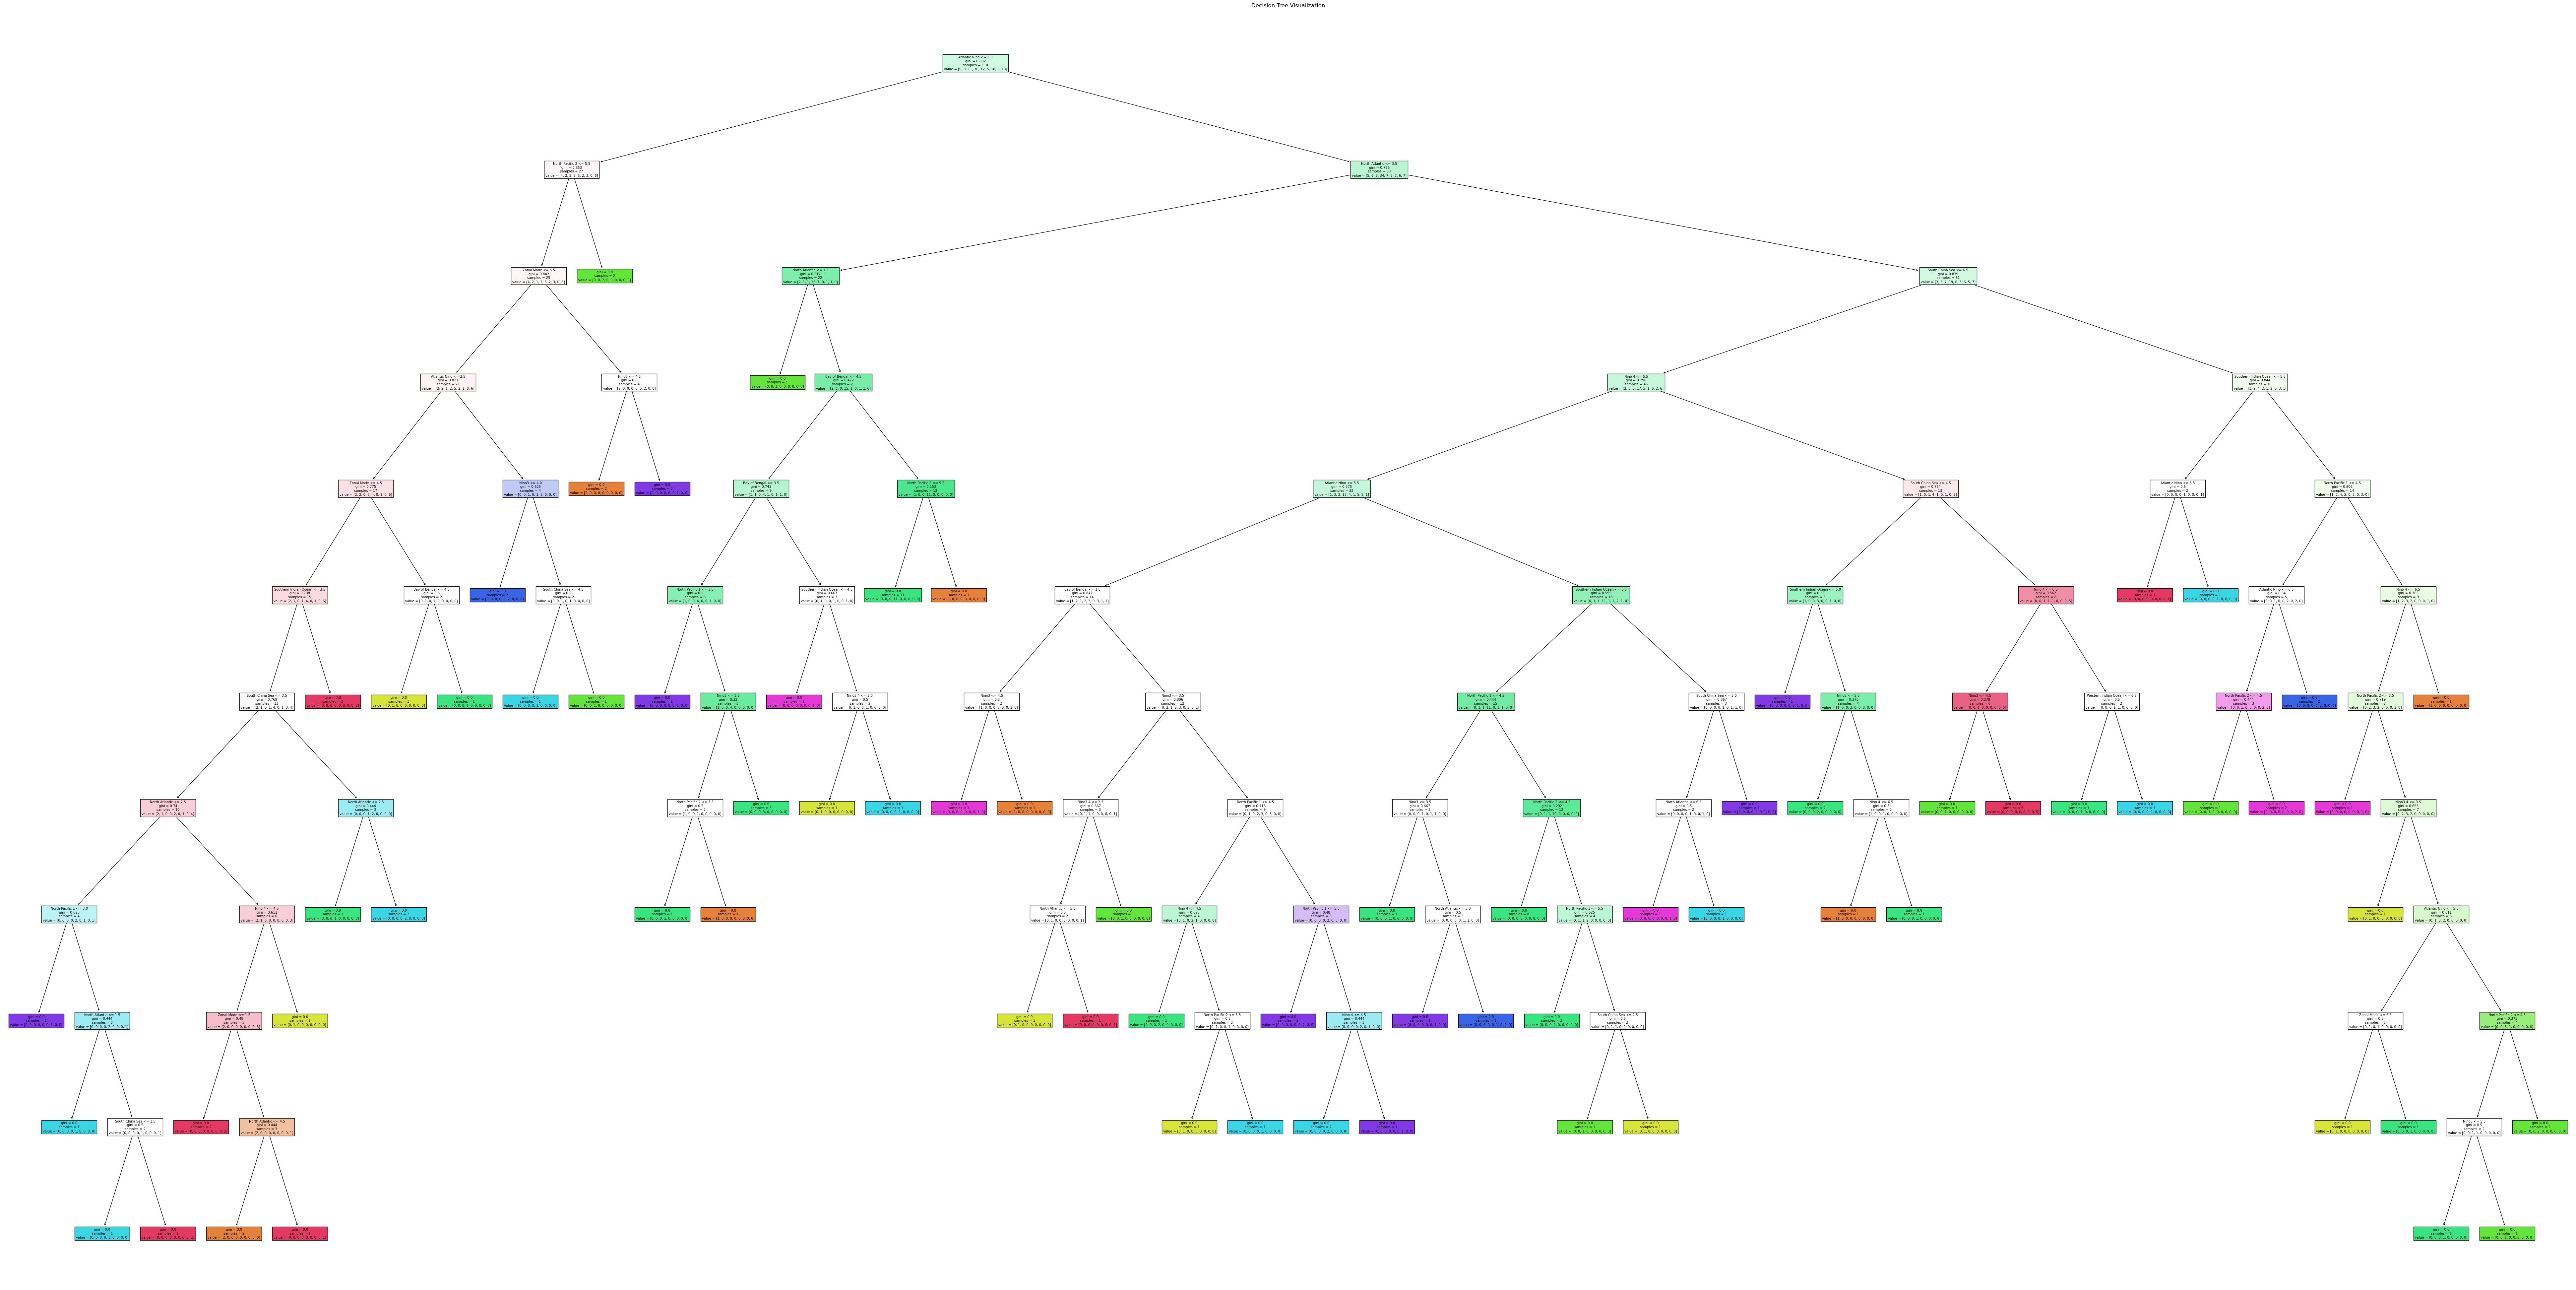

In [56]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()
